# Множественная линейная регрессия на чистых данных
### Цель работы
Познакомиться с основными приемами работы с множественными регрессионными моделями с использованием библиотеки sklearn.

### Задания для выполнения
- Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).
- Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк.
- Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.
- Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.
- Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.
- Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

### Методические указания

- Отчет по лабораторной работе сдается в виде файла интерактивного ноутбука Jupyter notebook и должен включать весь программный код, реализующий задания лабораторной работы, подробные пояснения, обоснования и выводы там, где это требуется в виде текстовых ячеек.
- Для сведения статистических данных можно воспользоваться средствами библиотек sklearn, numpy и pandas, либо табличным редактором Microsoft Excel. В любом случае, к отчету по лабораторной работе следует приложить как исходные данные без обработки, так и итоговый датасет, использующийся при обучении.
- Для диагностики обучения регрессионных моделей рекомендуется строить кривые обучения. Используйте пример из документации sklearn как образец.
- Для оценки качества построенной регрессии можно использовать целый ряд показателей. Одним из самых простых и универсальных является коэффициент детерминации (R2-score). Как использовать его читайте в официальной документации sklearn.

#### Приведем пример создания модели парной линейной регрессии средствами библиотеки scikit learn:




In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).

полиномиальная регрессия — это линейная модель https://data36.com/polynomial-regression-python-scikit-learn/

Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк.

In [3]:
x = pd.read_csv('4_x.csv')
x.columns = ["x1", "x2", "x3", "x4","x5","x6","x7"]  # adding a row
x.head()

,x1,x2,x3,x4,x5,x6,x7
0,-1.867913,-1.433816,0.275502,-2.366622,1.125262,1.074012,0.016971
1,-1.175679,0.680621,2.186182,-0.039128,-0.452769,1.250471,0.009887
2,1.112509,-0.364019,0.364768,-0.173030,-0.262987,-0.056980,1.064893
3,-0.769247,0.543090,0.405199,-1.942138,-0.174536,-0.042914,-1.430231
4,2.309512,0.420265,0.654373,0.182173,0.996858,0.128028,0.848242


In [6]:
y = pd.read_csv('4_y.csv')
y.columns = ["y1"]  # adding a row
y.head()

,y1
0,-176.891099
1,88.285473
2,66.530021
3,-165.442003
4,112.356082


Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      278 non-null    float64
 1   x2      278 non-null    float64
 2   x3      278 non-null    float64
 3   x4      278 non-null    float64
 4   x5      278 non-null    float64
 5   x6      278 non-null    float64
 6   x7      278 non-null    float64
dtypes: float64(7)
memory usage: 15.3 KB


In [8]:
x.describe()

,x1,x2,x3,x4,x5,x6,x7
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,-0.028506,-0.057365,0.043554,0.006929,-0.023000,-0.123977,-0.097490
std,0.956758,0.976323,1.033626,0.967814,1.061743,1.016295,1.086858
min,-2.688418,-2.484836,-2.353402,-2.568608,-3.223146,-3.428457,-2.725946
25%,-0.667908,-0.793305,-0.654445,-0.637426,-0.725398,-0.742766,-0.755606
50%,-0.097655,-0.079433,0.011180,0.028078,-0.004792,-0.118305,-0.121610
75%,0.703862,0.654602,0.725865,0.643254,0.703252,0.584428,0.690014
max,2.929506,2.743678,2.728819,2.725308,3.686425,2.443725,2.704077


In [9]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y1      278 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x1 = np.array(x['x1'])
x2 = np.array(x['x2'])
x3 = np.array(x['x3'])
x4 = np.array(x['x4'])
x5 = np.array(x['x5'])
x6 = np.array(x['x6'])
x7 = np.array(x['x7'])
y1 = np.array(y)

x1_train, x1_test, y_train, y_test = train_test_split(x1, y1, train_size=0.8, random_state=42)
x2_train, x2_test = train_test_split(x2, train_size=0.8, random_state=42)
x3_train, x3_test = train_test_split(x3, train_size=0.8, random_state=42)
x4_train, x4_test = train_test_split(x4, train_size=0.8, random_state=42)
x5_train, x5_test = train_test_split(x5, train_size=0.8, random_state=42)
x6_train, x6_test = train_test_split(x6, train_size=0.8, random_state=42)
x7_train, x7_test = train_test_split(x7, train_size=0.8, random_state=42)

Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [16]:
def plotting_predictions(x_predicted, y_predicted, degree):
    """
    
    """
    plt.figure(figsize=(10,5))
    plt.scatter(x_predicted,y_predicted,s=15)

    Input=[('polynomial',PolynomialFeatures(degree=degree)),('modal',LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(x_predicted.reshape(-1,1),y_predicted.reshape(-1,1))
    
    poly_pred=pipe.predict(x_predicted.reshape(-1,1))
    sorted_zip = sorted(zip(x_predicted,poly_pred))
    x_poly, poly_pred = zip(*sorted_zip)

    lm=LinearRegression()
    lm.fit(x_predicted.reshape(-1,1),y_predicted.reshape(-1,1))
    y_pred=lm.predict(x_predicted.reshape(-1,1))

    plt.plot(x_predicted,y_pred,color='r',label='Linear Regression')
    plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')

    plt.xlabel('Predictor',fontsize=16)
    plt.ylabel('Target',fontsize=16)
    plt.legend()
    plt.show()
    
    print('RMSE for Polynomial Regression',np.sqrt(mean_squared_error(y_predicted,poly_pred)))
    print("MSE for Polynomial Regression ", mean_squared_error(y_predicted, poly_pred))
    print("R2 for Polynomial Regression ", r2_score(y_predicted, poly_pred))
    print('RMSE for Linear Regression',np.sqrt(mean_squared_error(y_predicted,y_pred)))
    print("MSE for Linear Regression ", mean_squared_error(y_predicted, y_pred))
    print("R2 for Linear Regression ", r2_score(y_predicted, y_pred))

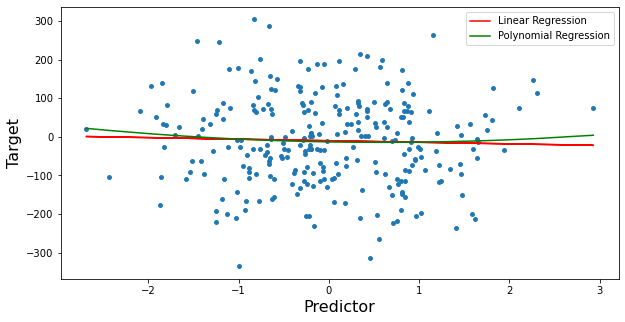

RMSE for Polynomial Regression 114.04547996575371
MSE for Polynomial Regression  13006.37150061913
R2 for Polynomial Regression  -0.002587021378403831
RMSE for Linear Regression 113.83247076448609
MSE for Linear Regression  12957.83140034758
R2 for Linear Regression  0.0011546581935156786


In [27]:
plotting_predictions(x1, y1, 2)

### Многомерная линейная регрессия

In [11]:
def calculation_linear_predictions(x_predicted, y_predicted, flag):
    """
    6 задание из главной части
    """
    
    model = LinearRegression()
    model.fit(x_predicted,y_predicted)
    poly_pred = model.predict(x_predicted)
    
    return r2_score(y_predicted,poly_pred) if flag==True else mean_squared_error(y_predicted,poly_pred)

In [359]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [360]:
df = pd.DataFrame([[calculation_predictions(x_train, y_train, True)], 
                   [calculation_predictions(x_test, y_test, True)]], 
                   columns = ['Linear'], index=['train', 'test'])
df # r2_score коэф детерминации

,Linear
train,0.992519
test,0.992509


In [361]:
df = pd.DataFrame([[calculation_predictions(x_train, y_train, False)], 
                   [calculation_predictions(x_test, y_test, False)]], 
                   columns = ['Linear'], index=['train', 'test'])
df # mean_squared_error метод средних квадратов

,Linear
train,97.219338
test,95.934128


### Контрольные вопросы
- Чем множественная регрессия отличается от парной?
- Какую функцию ошибки использует модель линейной регрессии?
- Какие метрики эффективности можно применять для оценки регрессионных моделей?
- Какие еще регрессоры есть в библиотеке sklearn?





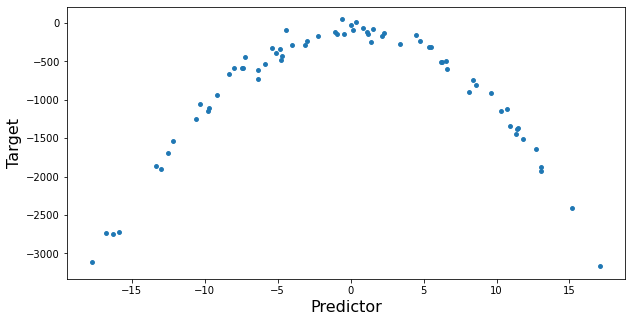

In [202]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# for calculating mean_squared error
from sklearn.metrics import mean_squared_error

# creating a dataset with curvilinear relationship
x=10*np.random.normal(0,1,70)
y=10*(-x**2)+np.random.normal(-100,100,70)

# plotting dataset
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [204]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Training Model
lm=LinearRegression()
lm.fit(x.reshape(-1,1),y.reshape(-1,1))

LinearRegression()

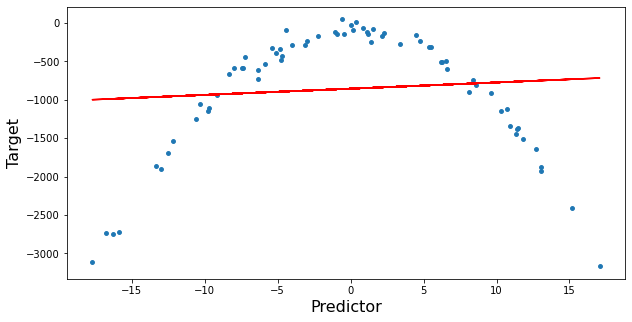

In [205]:
y_pred=lm.predict(x.reshape(-1,1))

# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [206]:
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))

RMSE for Linear Regression=> 804.6345622123675


In [207]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))
print(type(x))

<class 'numpy.ndarray'>


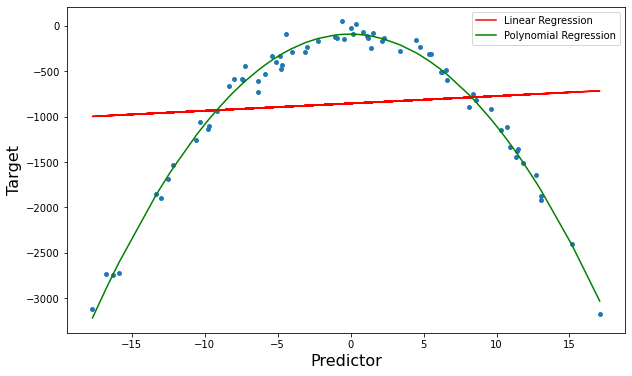

In [208]:
poly_pred=pipe.predict(x.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')

plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [209]:
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

RMSE for Polynomial Regression=> 1075.3644886802392


### Дополнительные задания
Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [61]:
x = pd.read_csv('4_x.csv')
x.columns = ["x1", "x2", "x3", "x4","x5","x6","x7"]  # adding a row
y = pd.read_csv('4_y.csv')
y.columns = ["y1"]  # adding a row

# x1 = x['x1'].tolist()
x1 = np.array(x['x1'])
x2 = np.array(x['x2'])
x3 = np.array(x['x3'])
x4 = np.array(x['x4'])
x5 = np.array(x['x5'])
x6 = np.array(x['x6'])
x7 = np.array(x['x7'])
y1 = np.array(y)

In [62]:
def plotting_predictions(x_predicted, y_predicted, degree):
    """
    
    """
    plt.figure(figsize=(10,5))
    plt.scatter(x_predicted,y_predicted,s=15)

    Input=[('polynomial',PolynomialFeatures(degree=degree)),('modal',LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(x_predicted.reshape(-1,1),y_predicted.reshape(-1,1))
    
    poly_pred=pipe.predict(x_predicted.reshape(-1,1))
    sorted_zip = sorted(zip(x_predicted,poly_pred))
    x_poly, poly_pred = zip(*sorted_zip)

    lm=LinearRegression()
    lm.fit(x_predicted.reshape(-1,1),y_predicted.reshape(-1,1))
    y_pred=lm.predict(x_predicted.reshape(-1,1))

    plt.plot(x_predicted,y_pred,color='r',label='Linear Regression')
    plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')

    plt.xlabel('Predictor',fontsize=16)
    plt.ylabel('Target',fontsize=16)
    plt.legend()
    plt.show()
    
    print('RMSE for Polynomial Regression',np.sqrt(mean_squared_error(y_predicted,poly_pred)))
    print('RMSE for Linear Regression',np.sqrt(mean_squared_error(y_predicted,y_pred)))
    
#     print('MSE train: {:.3f}, test: {:.3f}'.format(
#         mean_squared_error(y_train_scaled, y_train_pred),
#         mean_squared_error(y_test_scaled, y_test_pred)))
#     print('R^2 train: {:.3f}, test: {:.3f}'.format(
#         r2_score(y_train_scaled, y_train_pred),
#         r2_score(y_test_scaled, y_test_pred)))

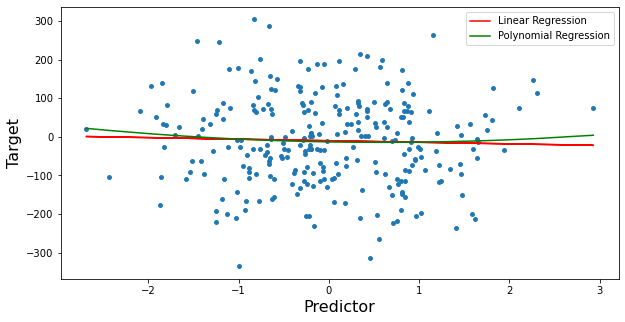

RMSE for Polynomial Regression 114.04547996575371
RMSE for Linear Regression 113.83247076448609


In [63]:
plotting_predictions(x1, y1, 2)

Постройте сводную таблицу показателей точности всех построенных моделей по тестовой и обучающей выборке. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [65]:
# # Что выведет на экран ячейка с кодом:
# import xlwings as xw
# import numpy as np

# wb = xw.Book()
# sht = wb.sheets['Лист1']
# sht.range((1, 1)).value = np.arange(12, dtype=np.int).reshape((3,4))

# fml = sht.range('A4').formula = '=SUM($A$1:A2)'
# sht.range('A4:C4').formulа = fml

# print(sht.range('A4').expand('right').value)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x1_train, x1_test, y_train, y_test = train_test_split(x1, y1, train_size=0.67, random_state=42)
x2_train, x2_test = train_test_split(x2, train_size=0.67, random_state=42)
x3_train, x3_test = train_test_split(x3, train_size=0.67, random_state=42)
x4_train, x4_test = train_test_split(x4, train_size=0.67, random_state=42)
x5_train, x5_test = train_test_split(x5, train_size=0.67, random_state=42)
x6_train, x6_test = train_test_split(x6, train_size=0.67, random_state=42)
x7_train, x7_test = train_test_split(x7, train_size=0.67, random_state=42)

In [29]:
def calculation_predictions(x_predicted, y_predicted, degree, flag):
    """
    
    """

    Input=[('polynomial',PolynomialFeatures(degree=degree)),('modal',LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(x_predicted.reshape(-1,1),y_predicted.reshape(-1,1))
    
    poly_pred=pipe.predict(x_predicted.reshape(-1,1))
    sorted_zip = sorted(zip(x_predicted,poly_pred))
    x_poly, poly_pred = zip(*sorted_zip)
    
    return r2_score(y_predicted,poly_pred) if flag==True else mean_squared_error(y_predicted,poly_pred)

In [68]:
df = pd.DataFrame([[calculation_predictions(x1_train, y_train, 2, True), calculation_predictions(x1_train, y_train, 3, True), calculation_predictions(x1_train, y_train, 10, True)], 
                   [calculation_predictions(x1_test, y_test, 2, True), calculation_predictions(x1_test, y_test, 3, True), calculation_predictions(x1_test, y_test, 10, True)]], 
                   columns = ['2 degree', '3 degree', '10 degree'], index=['train', 'test'])
df # коэф детерминации

,2 degree,3 degree,10 degree
train,-0.002327,-0.037765,-0.149054
test,-0.040736,-0.031846,0.047934


<AxesSubplot:>

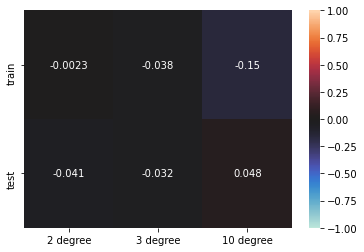

In [69]:
import seaborn as sns

sns.heatmap(df, annot = True, vmin=-1, vmax=1, center= 0)

- Лучший возможный балл-1.0,и он может быть отрицательным (потому что модель может быть произвольно хуже).Константная модель,которая всегда предсказывает ожидаемое значение y,без учета входных характеристик,получит оценку R^2 в 0.0.

- Коэффициент детерминации R2, или R-квадрат, варьируется в интервале между 0 и 1 и обозначает объяснительную мощность линейной регрессионной модели. Он вычисляет объясненную долю изменчивости в зависимой переменной.

- Обычно, чем ближе R2 к 1, тем лучше линия регрессии подогнана к точкам данных и больше изменчивости в Y объясняется независимой переменной X.

Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.


In [70]:
df = pd.DataFrame([[calculation_predictions(x1_train, y_train, 2, False), calculation_predictions(x1_train, y_train, 3, False), calculation_predictions(x1_train, y_train, 10, False)], 
                   [calculation_predictions(x1_test, y_test, 2, False), calculation_predictions(x1_test, y_test, 3, False), calculation_predictions(x1_test, y_test, 10, False)]], 
                   columns = ['2 degree', '3 degree', '10 degree'], index=['train', 'test'])
df # метод средних квадратов
# если ошибка на трейне меньше, чем на тесте, то модель переобучена

,2 degree,3 degree,10 degree
train,13405.969786,13879.945524,15368.422087
test,12649.363342,12541.306990,11571.646390


<AxesSubplot:>

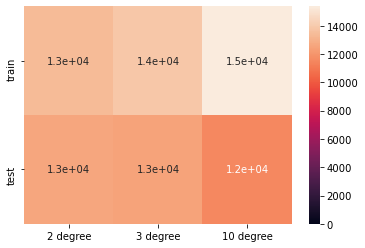

In [71]:
sns.heatmap(df, annot = True, vmin= 0)

(*) Замерьте время обучения на разных объемах данных и количестве признаков. Сделайте вывод о зависимости скорости обучения от объема обучающей выборки.

In [72]:
import time

def amount_of_time(x_predicted, y_predicted, degree):
    """
    
    """
    start = time.time() # точка отсчета времени
    
    Input=[('polynomial',PolynomialFeatures(degree=degree)),('modal',LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(x_predicted.reshape(-1,1),y_predicted.reshape(-1,1))
    
    poly_pred=pipe.predict(x_predicted.reshape(-1,1))
    sorted_zip = sorted(zip(x_predicted,poly_pred))
    x_poly, poly_pred = zip(*sorted_zip)
    
    end = time.time() - start # собственно время работы программы
    
    return end # вывод времени

In [73]:
df = pd.DataFrame([[amount_of_time(x1_train, y_train, 2), amount_of_time(x1_train, y_train, 3), amount_of_time(x1_train, y_train, 10)], 
                   [amount_of_time(x1_test, y_test, 2), amount_of_time(x1_test, y_test, 3), amount_of_time(x1_test, y_test, 10)]], 
                   columns = ['2 degree', '3 degree', '10 degree'], index=['train', 'test'])
df

,2 degree,3 degree,10 degree
train,0.001940,0.000995,0.000909
test,0.001987,0.000000,0.001994


<AxesSubplot:>

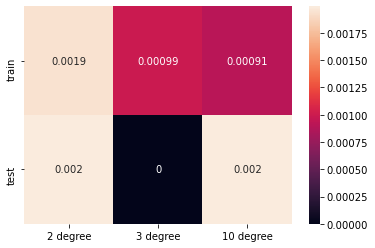

In [74]:
sns.heatmap(df, annot = True, vmin= 0)

- Тестовая выборка, объемом в 2 раза меньшим, чем обучающая, обучается также примерно в 2 раза быстрее. 
- по 3 признакам выборка почему то обучается быстрее, чем по 2. В 10-мерном признаковом простарнстве скорость соответственно убывает.